In [1]:
#imorting the usual libraries
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib 
%matplotlib inline
print(os.listdir('../Social'))

['filtered_Monthly_data.csv', 'Untitled.ipynb', 'CMO_MSP_Mandi.csv', 'Price Comparison.ipynb', 'Filter Outliers.ipynb', 'Seasonality_type.csv', 'filtered_cmo_mandi.csv', 'Deseasonalized_price.csv', 'Detect Seasonality type and deseasonalize prices.ipynb', '.ipynb_checkpoints', 'Monthly_data_cmo.csv']


In [3]:
#loading the datasets and a quick look around them
cmo_mandi = pd.read_csv('CMO_MSP_Mandi.csv')
monthly = pd.read_csv('Monthly_data_cmo.csv')
print('CMO MSP \n', cmo_mandi.head(20), '\n')
print('Monthly Data \n', monthly.head(20), '\n')

CMO MSP 
              commodity  year          Type  msprice  msp_filter
0       PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1      RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2         Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3        SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4                BAJRI  2012  Kharif Crops   1175.0           1
5                MAIZE  2012  Kharif Crops   1175.0           1
6        Ragi_Maldandi  2012  Kharif Crops   1500.0           1
7     PIGEON PEA (TUR)  2012  Kharif Crops   3850.0           1
8     SPILT GERRN GRAM  2012  Kharif Crops   4400.0           1
9     SPLIT BLACK GRAM  2012  Kharif Crops   4300.0           1
10              COTTON  2012  Kharif Crops   3600.0           1
11  Cotton_Long Staple  2012  Kharif Crops   3900.0           1
12      GR.NUT KERNELS  2012  Kharif Crops   3700.0           1
13           SUNFLOWER  2012  Kharif Crops   3700.0           1
14      Soyabean_Black  2012  

In [4]:
print(len(cmo_mandi))
print(len(monthly))

155
62429


Getting an idea about the distribution of the values in numeric values of Monthly dataset

Year


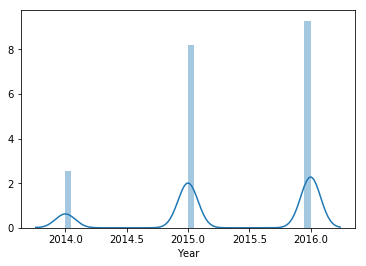

arrivals_in_qtl


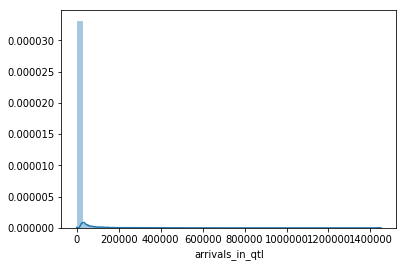

min_price


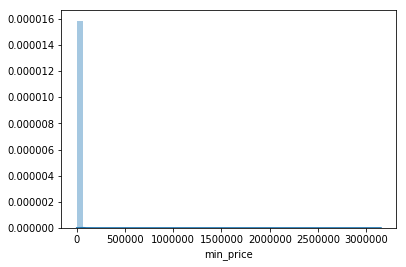

max_price


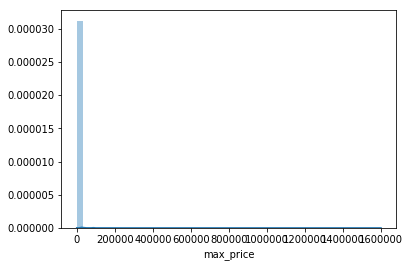

modal_price


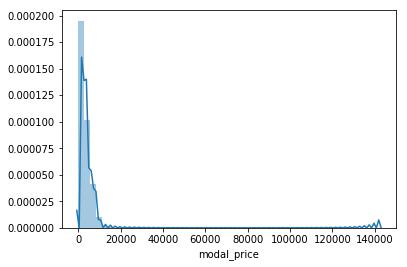

In [5]:
monthly_ = monthly.select_dtypes(int)
for column in monthly_.columns:
    print(column)
    sns.distplot(monthly_[column])
    plt.show()

Trying to detect the outliers on the basis of sklearn isolation forest. This gives an anomaly score.The score is low or negative(more specifically) for the region or the values where the probability of having a data point in the distribution is low. Plotting to see its behavior. Generally where we have a score of -0.2 or less those regions are considered as outliers. So removing the data points for each separate variable where we get score below that value.

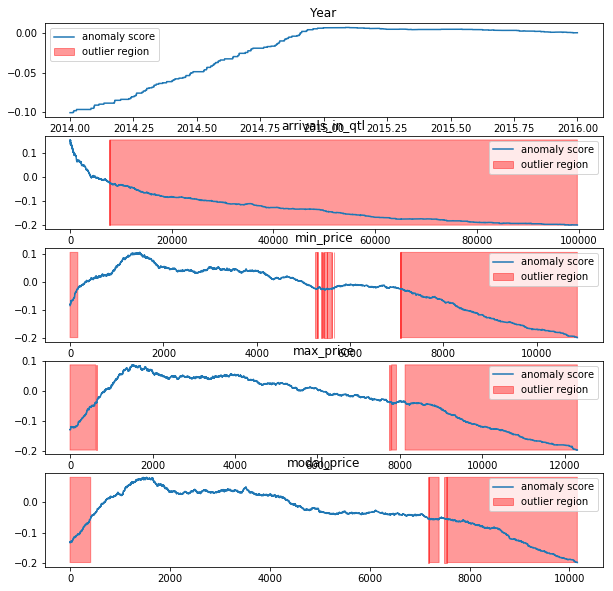

In [6]:
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
fig, axs = plt.subplots(5, 1, figsize=(10, 10), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = np.array([False for i in range(len(monthly))])
for i, column in enumerate(monthly.select_dtypes(int).columns):
    monthly[column] = monthly[column].astype(int)
    isolation_forest = IsolationForest()
    isolation_forest.fit(monthly[column].values.reshape(-1,1))
    ind = (isolation_forest.decision_function(np.array(monthly[column]).reshape(len(monthly), 1)) > (-0.2))
    monthly = monthly[ind]
    xx = np.linspace(monthly[column].min(), monthly[column].max(), len(monthly)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)

    outlier = isolation_forest.predict(xx)

    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In [7]:
monthly.to_csv('filtered_Monthly_data.csv')
print(len(monthly))

60550


#### Doing the same procedure for Mandi Msp Data
####we can see that around 2000 data points were removed in the monthly dataset


In [8]:
print(cmo_mandi.info)
print(cmo_mandi.nunique())
print(cmo_mandi.isnull().sum())

<bound method DataFrame.info of                   commodity  year          Type  msprice  msp_filter
0            PADDY-UNHUSKED  2012  Kharif Crops   1250.0           1
1           RICE(PADDY-HUS)  2012  Kharif Crops   1280.0           1
2              Jowar_Hybrid  2012  Kharif Crops   1500.0           1
3             SORGUM(JAWAR)  2012  Kharif Crops   1520.0           1
4                     BAJRI  2012  Kharif Crops   1175.0           1
5                     MAIZE  2012  Kharif Crops   1175.0           1
6             Ragi_Maldandi  2012  Kharif Crops   1500.0           1
7          PIGEON PEA (TUR)  2012  Kharif Crops   3850.0           1
8          SPILT GERRN GRAM  2012  Kharif Crops   4400.0           1
9          SPLIT BLACK GRAM  2012  Kharif Crops   4300.0           1
10                   COTTON  2012  Kharif Crops   3600.0           1
11       Cotton_Long Staple  2012  Kharif Crops   3900.0           1
12           GR.NUT KERNELS  2012  Kharif Crops   3700.0           1
13

In [9]:
# filling in the msprice 'NAN' values with their median
cmo_mandi['msprice'] = cmo_mandi['msprice'].fillna(cmo_mandi['msprice'].median())

Text(0.5, 1.0, 'msprice')

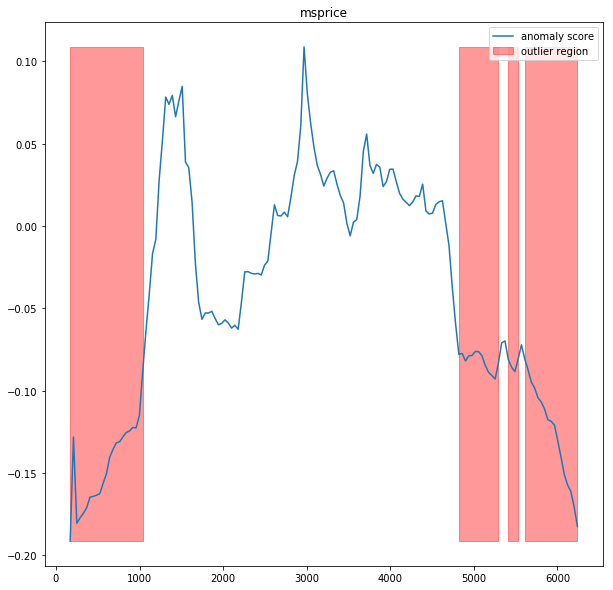

In [10]:
fig, axs = plt.subplots(figsize = (10, 10))

ind = np.array([False for i in range(len(cmo_mandi))])
isolate = IsolationForest()
isolate.fit(cmo_mandi['msprice'].values.reshape(-1,1))
ind = (isolation_forest.decision_function(np.array(cmo_mandi['msprice']).reshape(len(cmo_mandi), 1)) > (-0.2))
cmo_mandi = cmo_mandi[ind]
xx = np.linspace(cmo_mandi['msprice'].min(), cmo_mandi['msprice'].max(), len(cmo_mandi)).reshape(-1,1)
anomaly_score = isolate.decision_function(xx)

outlier = isolate.predict(xx)

axs.plot(xx, anomaly_score, label='anomaly score')
axs.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
axs.legend()
axs.set_title('msprice')

In [11]:
print(len(cmo_mandi))
cmo_mandi.to_csv('filtered_cmo_mandi.csv')

155


### No data points were removed in the cmo mandi dataset